# **Step 3: Computation**

# **Linear Discriminant Analysis**

Original Data Shape: X=(450, 2), y=(450,)


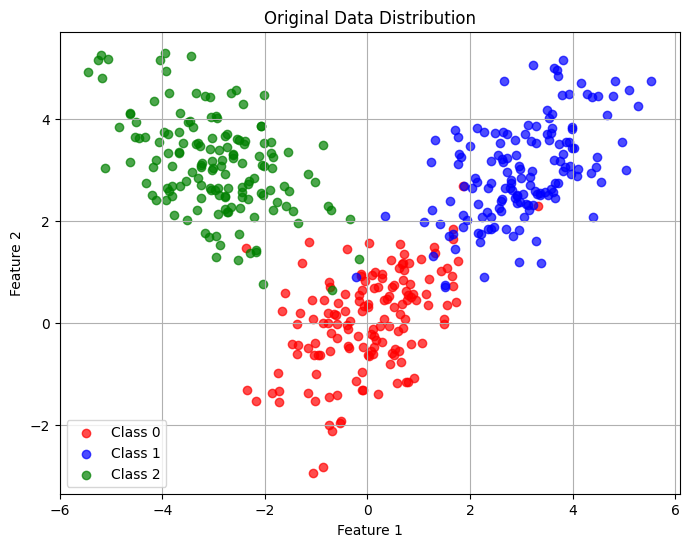

Transformed Training Data Shape: (315, 2)
Transformed Test Data Shape: (135, 2)


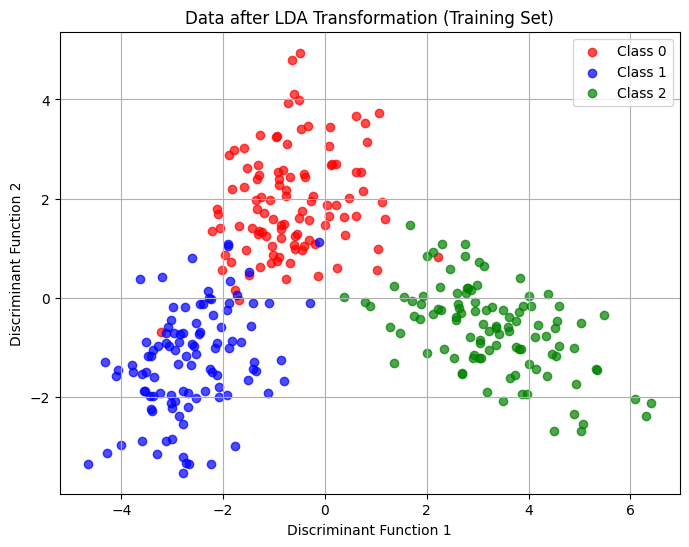


--- Classification Report ---
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97        45
         1.0       0.98      1.00      0.99        45
         2.0       1.00      0.96      0.98        45

    accuracy                           0.98       135
   macro avg       0.98      0.98      0.98       135
weighted avg       0.98      0.98      0.98       135


--- Confusion Matrix ---
[[44  1  0]
 [ 0 45  0]
 [ 2  0 43]]

Accuracy: 0.9778

--- Coefficients of Discriminant Functions ---
Transformation matrix (scalings_):
[[-2.60074567 -0.32934293]
 [ 0.54742687 -1.66104145]]


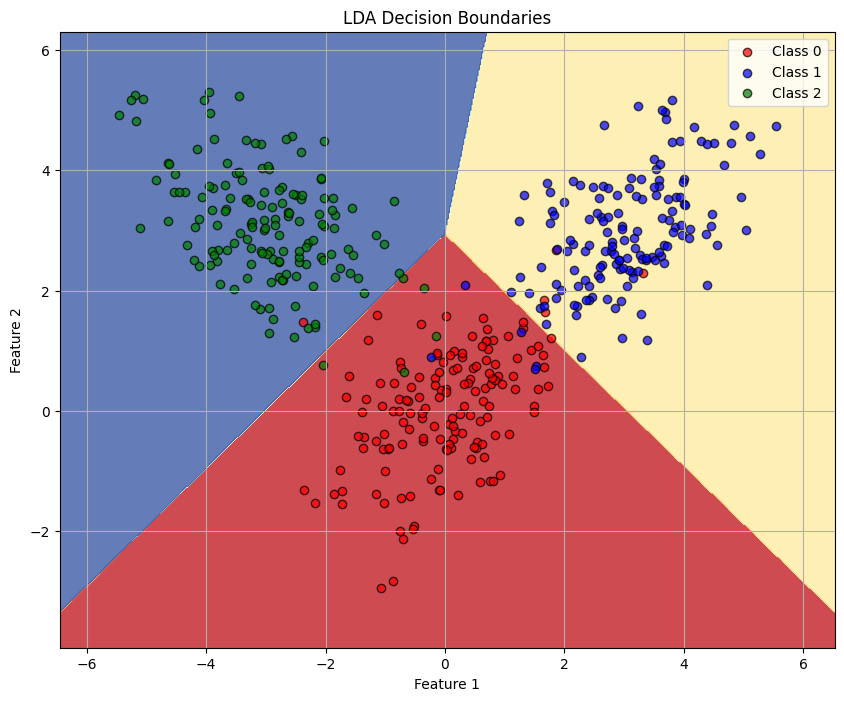

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Generate Synthetic Data
# Let's create a synthetic dataset with two classes that are somewhat linearly separable
np.random.seed(42)
n_samples = 300
X_class0 = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], n_samples // 2)
y_class0 = np.zeros(n_samples // 2)
X_class1 = np.random.multivariate_normal([3, 3], [[1, 0.5], [0.5, 1]], n_samples // 2)
y_class1 = np.ones(n_samples // 2)

X = np.vstack((X_class0, X_class1))
y = np.hstack((y_class0, y_class1))

# Add a third class for multi-class demonstration
X_class2 = np.random.multivariate_normal([-3, 3], [[1, -0.5], [-0.5, 1]], n_samples // 2)
y_class2 = np.full(n_samples // 2, 2)

X = np.vstack((X, X_class2))
y = np.hstack((y, y_class2))

print(f"Original Data Shape: X={X.shape}, y={y.shape}")

# 2. Visualize Original Data
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Class 0', alpha=0.7, c='red')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1', alpha=0.7, c='blue')
plt.scatter(X[y == 2, 0], X[y == 2, 1], label='Class 2', alpha=0.7, c='green')
plt.title('Original Data Distribution')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# 3. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 4. Standardize Features
# Scale features before applying LDA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Apply Linear Discriminant Analysis
# n_components specifies the number of discriminant functions to keep.
# For K classes, LDA can find at most K-1 discriminant functions.
# Here, we have 3 classes, so max n_components = 2.
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

print(f"Transformed Training Data Shape: {X_train_lda.shape}")
print(f"Transformed Test Data Shape: {X_test_lda.shape}")

# 6. Visualize Transformed Data
plt.figure(figsize=(8, 6))
plt.scatter(X_train_lda[y_train == 0, 0], X_train_lda[y_train == 0, 1], label='Class 0', alpha=0.7, c='red')
plt.scatter(X_train_lda[y_train == 1, 0], X_train_lda[y_train == 1, 1], label='Class 1', alpha=0.7, c='blue')
plt.scatter(X_train_lda[y_train == 2, 0], X_train_lda[y_train == 2, 1], label='Class 2', alpha=0.7, c='green')
plt.title('Data after LDA Transformation (Training Set)')
plt.xlabel('Discriminant Function 1')
plt.ylabel('Discriminant Function 2')
plt.legend()
plt.grid(True)
plt.show()

# 7. Classification using LDA (as a classifier)
# LDA can also be used directly as a classifier after fitting
lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train_scaled, y_train)
y_pred = lda_classifier.predict(X_test_scaled)

# 8. Evaluate the Classifier
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

print("\n--- Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred))

print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")

# 9. Coefficients of the discriminant functions
print("\n--- Coefficients of Discriminant Functions ---")
# The coefficients represent the linear combination of features for each discriminant axis
# For binary classification, there's one set of coefficients.
# For multi-class, it's typically (n_classes - 1) discriminant functions.
# The `coef_` attribute gives coefficients for each class for classification.
# The `scalings_` attribute gives the transformation matrix for dimensionality reduction.
# Let's print the transformation matrix (eigenvectors) if n_components is used:
if lda.n_components is not None:
    print(f"Transformation matrix (scalings_):\n{lda.scalings_}")
else:
    print("LDA was used primarily for classification, not explicit dimensionality reduction in this step.")

# Plotting decision boundaries (for 2D input for simplicity)
if X.shape[1] == 2:
    plt.figure(figsize=(10, 8))
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predict on the meshgrid points
    Z = lda_classifier.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Class 0', alpha=0.7, c='red', edgecolors='k')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1', alpha=0.7, c='blue', edgecolors='k')
    plt.scatter(X[y == 2, 0], X[y == 2, 1], label='Class 2', alpha=0.7, c='green', edgecolors='k')
    plt.title('LDA Decision Boundaries')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

/tmp/ipython-input-2-1747453884.py:23: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


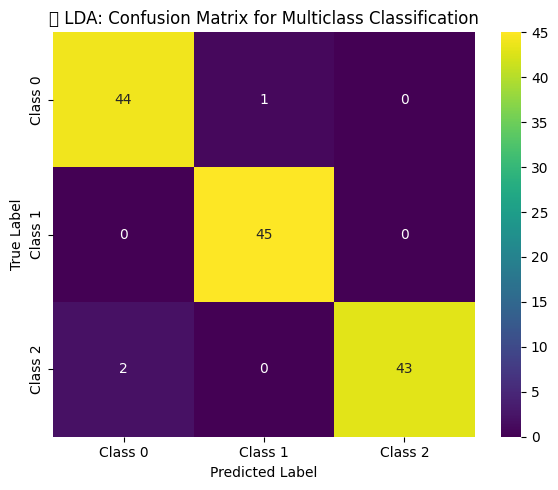

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion matrix data
conf_matrix = np.array([
    [44, 1, 0],
    [0, 45, 0],
    [2, 0, 43]
])

# Labels
class_names = ['Class 0', 'Class 1', 'Class 2']

# Plotting
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis',
            xticklabels=class_names, yticklabels=class_names)

plt.title("📊 LDA: Confusion Matrix for Multiclass Classification")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


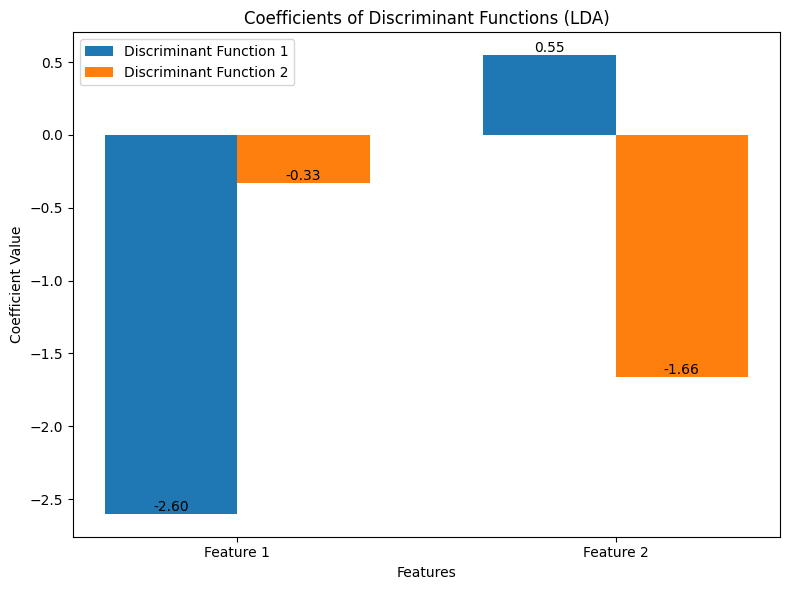

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Coefficients of the discriminant functions
scalings = np.array([
    [-2.60074567, -0.32934293],
    [0.54742687, -1.66104145]
])

# Feature names (for illustration, assume two features)
features = ['Feature 1', 'Feature 2']
x = np.arange(len(features))  # Feature indices

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
width = 0.35  # width of the bars

# Bars for each discriminant function
bar1 = ax.bar(x - width/2, scalings[:, 0], width, label='Discriminant Function 1')
bar2 = ax.bar(x + width/2, scalings[:, 1], width, label='Discriminant Function 2')

# Adding labels and title
ax.set_xlabel('Features')
ax.set_ylabel('Coefficient Value')
ax.set_title('Coefficients of Discriminant Functions (LDA)')
ax.set_xticks(x)
ax.set_xticklabels(features)
ax.legend()

# Show values on top of bars
for bar in bar1 + bar2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


#**Support Vector Machines (SVM)**

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        28
           1       0.94      1.00      0.97        32

    accuracy                           0.97        60
   macro avg       0.97      0.96      0.97        60
weighted avg       0.97      0.97      0.97        60



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


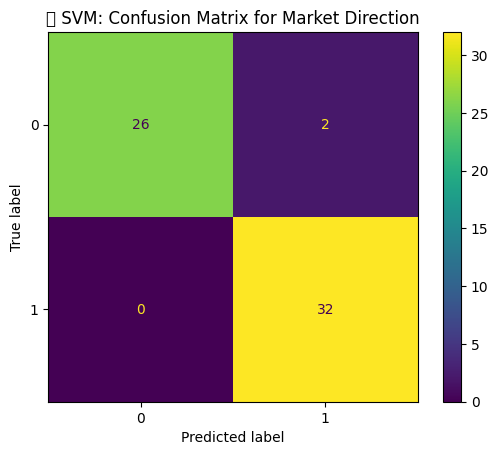

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.datasets import make_classification

# Simulate financial-like data: e.g., MACD and RSI-based signals
X, y = make_classification(n_samples=200, n_features=2, n_informative=2,
                           n_redundant=0, class_sep=1.5, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train SVM classifier with RBF kernel
model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("📊 SVM: Confusion Matrix for Market Direction")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


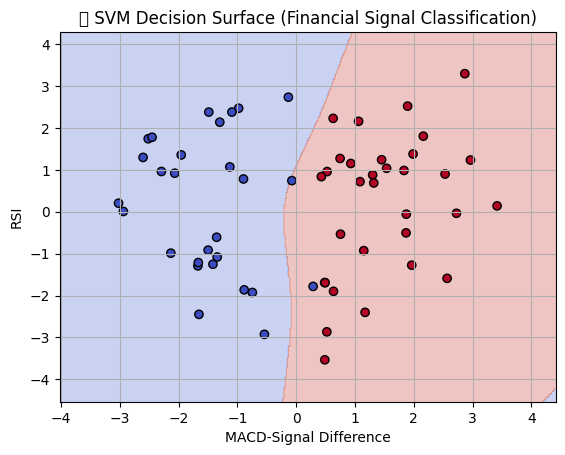

In [5]:
def plot_svm_boundary(X, y, model):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title("🔎 SVM Decision Surface (Financial Signal Classification)")
    plt.xlabel("MACD-Signal Difference")
    plt.ylabel("RSI")
    plt.grid(True)
    plt.show()

plot_svm_boundary(X_test, y_test, model)


# Neural Networks

In [6]:
%pip install nnv --quiet

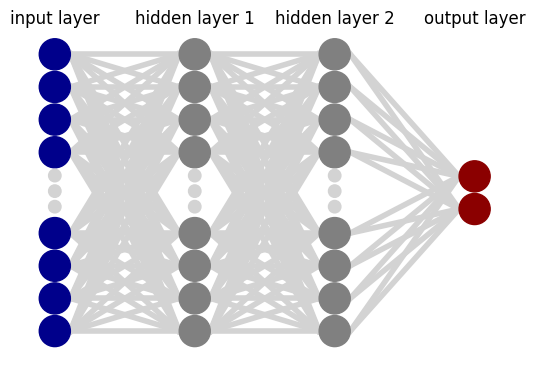

In [7]:
import matplotlib.pyplot as plt
from nnv import NNV

# a basic look
layers = [
    {"title": "input layer", "units": 10, "color": "darkBlue"},
    {"title": "hidden layer 1", "units": 20},
    {"title": "hidden layer 2", "units": 20},
    {"title": "output layer", "units": 2, "color": "darkRed"},
]

NNV(layers, max_num_nodes_visible=8, node_radius=10, spacing_layer=70, font_size=12).render()
plt.show()

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes, fetch_california_housing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# data loading and exploration
houses = fetch_california_housing(as_frame=True)
display(houses.frame.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
houses.frame.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [10]:
# train/test split
train, test = train_test_split(houses.frame, test_size=0.1, shuffle=True)
y_train = train["MedHouseVal"]
X_train = train.drop(columns=["MedHouseVal"])
y_test = test["MedHouseVal"]
X_test = test.drop(columns=["MedHouseVal"])

# model definition and training
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(
            8, activation="sigmoid", input_shape=(X_train.shape[1],)
        ),
        tf.keras.layers.Dense(8, activation="sigmoid"),
        tf.keras.layers.Dense(4, activation="sigmoid"),
        tf.keras.layers.Dense(1),
    ]
)
model.compile(
    loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=["mae"]
)

history = model.fit(X_train, y_train, epochs=750, batch_size=64, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


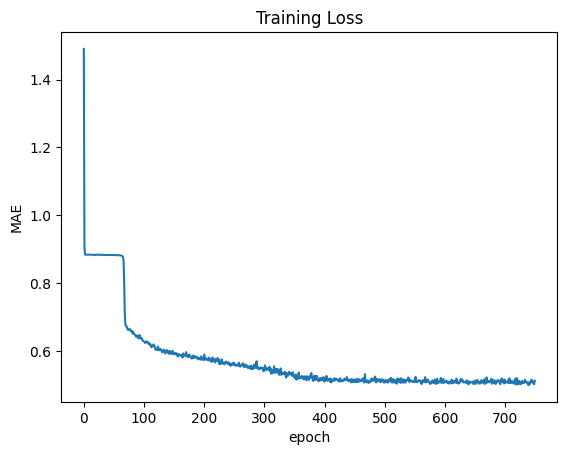

In [11]:
plt.xlabel("epoch")
plt.ylabel("MAE")
plt.title("Training Loss")
plt.plot(history.history["loss"])

In [12]:
# results
preds = model.predict(X_test)
mae = tf.metrics.mae(y_true=y_test, y_pred=preds.squeeze()).numpy()
print("Final training MAE:", history.history["loss"][-1])
print("Test MAE:", mae)
print("Flat guess MAE:", abs(y_test - y_test.mean()).mean())

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Final training MAE: 0.5138648748397827
Test MAE: 0.5102105
Flat guess MAE: 0.9032264622769066


# **Step 4: Hyperparameter Tuning**

# **Linear Discriminant Analysis**
# 1. GridSearch

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
import numpy as np

# Generate synthetic data
X, y = make_classification(n_samples=500, n_features=10, n_informative=5, n_redundant=2, n_classes=3, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the parameter grid
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': [None, 'auto'] + list(np.arange(0.0, 1.1, 0.2)), # Example range for shrinkage
    'n_components': [None, 1, 2] # Max 2 for 3 classes
}

# Filter out invalid combinations (shrinkage only with lsqr/eigen)
# This often needs to be done programmatically or by careful param_grid construction
# For simplicity, let's adjust for demonstration:
# A more robust approach would be to define a custom scoring function or filter results.

lda = LinearDiscriminantAnalysis()
grid_search = GridSearchCV(lda, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_scaled, y)

print(f"Best hyperparameters (Grid Search): {grid_search.best_params_}")
print(f"Best cross-validation accuracy (Grid Search): {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best hyperparameters (Grid Search): {'n_components': None, 'shrinkage': None, 'solver': 'svd'}
Best cross-validation accuracy (Grid Search): 0.6820


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
135 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py", line 716, in fit
    self._solve_eigen(
  F